<h2>A Regression Model for Predicting the marks obtained with the number of hours given</h2>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
url="http://bit.ly/w-data"
std_data=pd.read_csv(url)
std_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [36]:
std_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'STUDENT SCORES')

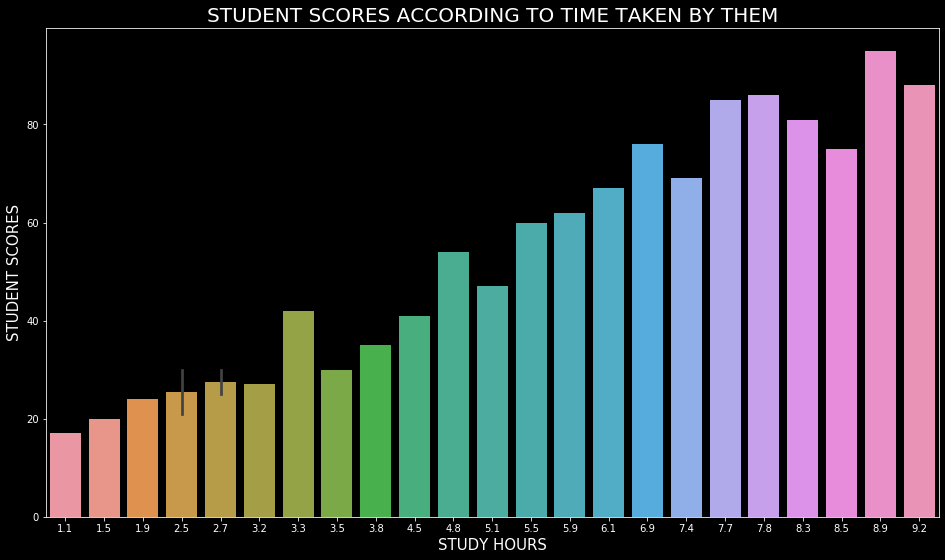

In [37]:
plt.style.use('dark_background')
plt.figure(figsize=(16,9))
sns.barplot(x='Hours',y='Scores',data=std_data)
plt.title('STUDENT SCORES ACCORDING TO TIME TAKEN BY THEM',size=20)
plt.xlabel('STUDY HOURS' ,size=15)
plt.ylabel('STUDENT SCORES',size=15)

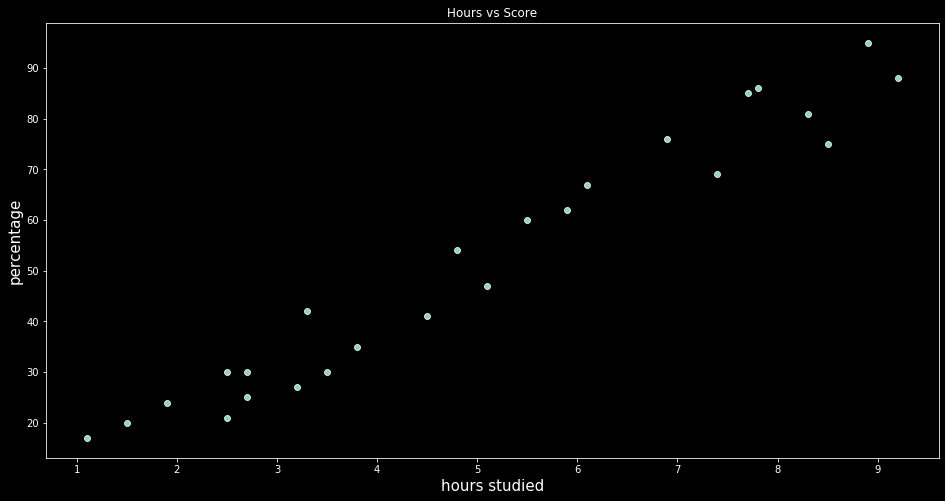

In [39]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Hours',y='Scores',data=std_data)
plt.title('Hours vs Score');
plt.xlabel('hours studied' ,size=15)
plt.ylabel('percentage',size=15)
plt.show()

In [41]:
X=std_data[['Hours']]
Y=std_data['Scores']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lm.coef_

array([9.71054094])

In [44]:
lm.intercept_

2.794196676599803

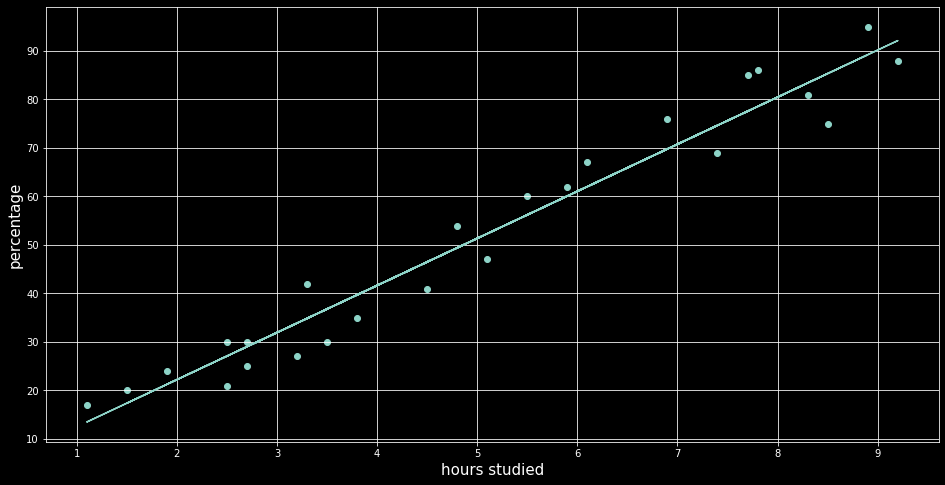

In [46]:
rl=lm.coef_*X+lm.intercept_
plt.figure(figsize=(16,8))
plt.scatter(X,Y)
plt.plot(X,rl);
plt.xlabel('hours studied' ,size=15)
plt.ylabel('percentage',size=15)
plt.grid()
plt.show()

<h1>PREDICTION TIME</h2>

In [47]:
predict=lm.predict(X_test)
predict

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [51]:
df=pd.DataFrame({'Actual':Y_test,'Predicted': predict})
df

,Actual,Predicted
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


<h2>Evaluating the model</h2>

In [54]:
#check performance of algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predict))

Mean Absolute Error: 4.499999999999998


In [56]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predict))

Mean Squared Error: 23.61945761415174


In [57]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,predict)))

Root Mean Squared Error: 4.859985351228103
